In [35]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import geopandas as gpd

import requests
from bs4 import BeautifulSoup

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 200

# import yaml
from paths import *
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

## Manipulate Data from SEADE

In [38]:
#load variables and geocodes
var, geocode_seade = io.load_variables_geocodes()

#load KPIs, last kpi and historic
df_last, dh_history = io.load_kpis()

#merge the variables and geocodes with KPIs
dd = manipulation.merge_data(df_last, var, geocode_seade)

#load shapefiles
sp = gpd.read_file('../../brasil_geodata/maps/sp_municipios.json')
sp = sp[['geocodigo','geometry']]

In [8]:
dd.head()

,localidade,variavel,unidade,periodo,ano,valor,tipo,portal
8,Aparecida,Alunos que Atingiram o Nível Abaixo do Básico na Prova Brasil em Língua Portuguesa (5º ano) - Re...,(Em %),2007/2009/2011/2013/2015,2015,-,educacao,NaN
5,Caçapava,Alunos que Atingiram o Nível Abaixo do Básico na Prova Brasil em Língua Portuguesa (5º ano) - Re...,(Em %),2007/2009/2011/2013/2015,2015,-,educacao,NaN
3,Cruzeiro,Alunos que Atingiram o Nível Abaixo do Básico na Prova Brasil em Língua Portuguesa (5º ano) - Re...,(Em %),2007/2009/2011/2013/2015,2015,-,educacao,NaN
6,Cunha,Alunos que Atingiram o Nível Abaixo do Básico na Prova Brasil em Língua Portuguesa (5º ano) - Re...,(Em %),2007/2009/2011/2013/2015,2015,12.30,educacao,NaN
0,Guaratinguetá,Alunos que Atingiram o Nível Abaixo do Básico na Prova Brasil em Língua Portuguesa (5º ano) - Re...,(Em %),2007/2009/2011/2013/2015,2015,-,educacao,NaN


## Educacao
 - [QEdu](https://www.qedu.org.br/) 
 - [Dados Abertos da Educação de SP](https://dados.educacao.sp.gov.br/search/type/dataset)
 - [INEP - Microdados](http://portal.inep.gov.br/microdados#)
 - [IDEB](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)
 - [Censo Escolar - BI](https://inepdata.inep.gov.br/analytics/saw.dll?Portal&PortalPath=%2Fshared%2FEduca%C3%A7%C3%A3o%20B%C3%A1sica%20-%20Acesso%20Externo%2FArquivos%2FCenso%2FConsolidado%2FInforma%C3%A7%C3%B5es%20Consolidadas%2FFun%C3%A7%C3%B5es%20Docentes%2FPanorama%20deFun%C3%A7%C3%B5es%20Docentes%20na%20Educa%C3%A7%C3%A3o%20B%C3%A1sica)



In [39]:
mask = dd['localidade']=='Taubaté'
dd[mask]['variavel']

33                                                                                      Concluintes do Ensino Fundamental
74                                                                                            Concluintes do Ensino Médio
115                                                                                                  Matrículas na Creche
156                                                                                       Matrículas na Educação Infantil
197                                                                                              Matrículas na Pré-escola
238                                                                                      Matrículas no Ensino Fundamental
279                                                                                            Matrículas no Ensino Médio
320        Meta do Índice de Desenvolvimento da Educação Básica (IDEB) - Ensino Fundamental - Anos Finais - Rede Estadual
360       Meta do Índice

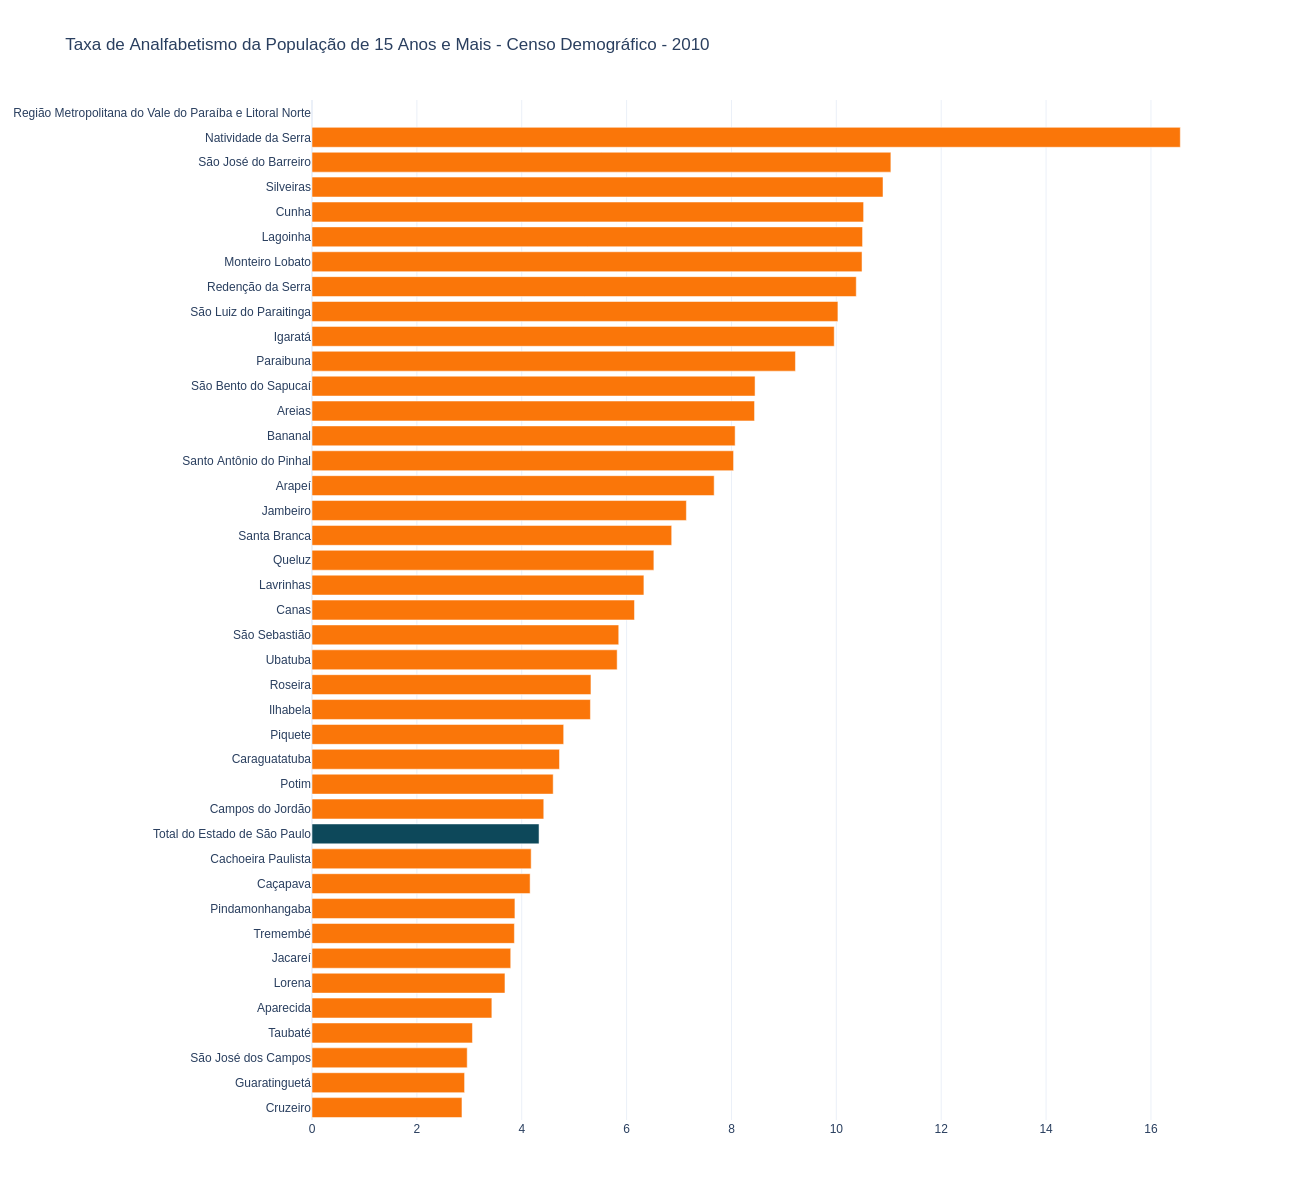

In [50]:
# var = 'Índice de Desenvolvimento da Educação do Estado de São Paulo (Idesp) - Ensino Médio'
var = 'Taxa de Analfabetismo da População de 15 Anos e Mais - Censo Demográfico'
fig, da = vis_graphs.plot_bars(dd,var)
fig

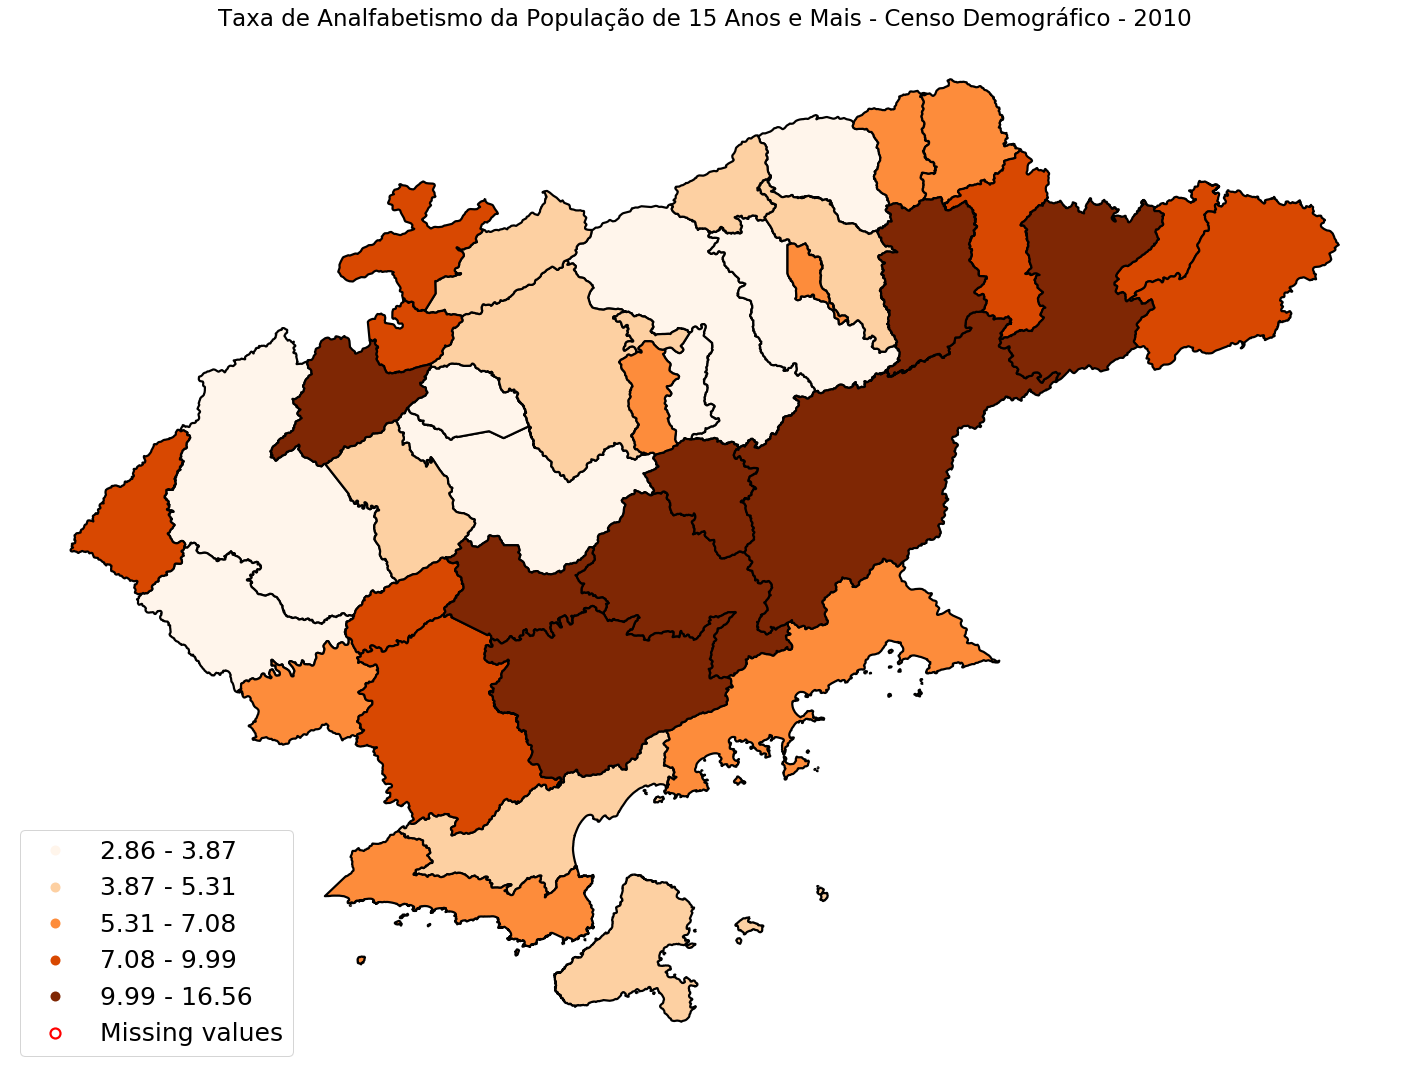

In [52]:
fig = vis_graphs.plot_map(dd,sp,var)

In [292]:


from lightning import Lightning

from numpy import random, zeros




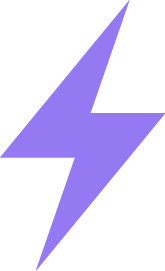

Problem connecting to server at http://public.lightning-viz.org
status code: 404


ValueError: Could not access server

In [293]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [294]:
from lightning import Lightning

lgn = Lightning(host="http://my-lightning-instance.herokuapp.com")

lgn.create_session()
lgn.create_session("provide an optional session name")

Lightning initialized
Problem connecting to server at http://my-lightning-instance.herokuapp.com
status code: 404


ValueError: Could not access server